<a href="https://colab.research.google.com/github/Nacho2904/CURSO-LEARNING1/blob/tareas/viernes_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 2: Síntesis de muestras utilizando Autoencoders.

## 1. 


Mediante un autoencoder comprimir las imágenes de fashin-MINST

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

path_a_fashion_mnist_comprimido = 'gdrive/MyDrive/fashion_mnist_dimension_reducida.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
df_fashion_mnist_comprimido = pd.read_csv(path_a_fashion_mnist_comprimido)
df_fashion_mnist_comprimido = df_fashion_mnist_comprimido.drop(columns=['Unnamed: 0'])
df_fashion_mnist_comprimido = df_fashion_mnist_comprimido[:-1]
df_fashion_mnist_comprimido["label"] = df_fashion_mnist_comprimido["label"].astype(np.int16)
df_fashion_mnist_comprimido

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,label
0,127.911232,109.583565,0.0,338.962769,56.968815,125.748932,181.324371,132.251373,0.0,121.468445,...,127.145950,189.907089,164.352676,173.750565,221.056641,0.0,0.0,212.225800,0.0,9
1,196.846115,76.695076,0.0,201.659378,148.585556,155.065567,143.689453,180.472916,0.0,117.361015,...,105.169373,180.772797,93.903244,155.506897,180.412216,0.0,0.0,411.486145,0.0,0
2,35.947762,48.044437,0.0,84.895897,74.211960,32.060188,57.044548,66.279053,0.0,42.043617,...,46.982876,50.287220,44.462143,47.421143,44.736378,0.0,0.0,156.051544,0.0,0
3,51.324921,47.423634,0.0,98.544189,41.800117,83.696274,77.512817,55.240555,0.0,72.385048,...,90.973076,59.694908,42.828796,62.341091,116.317978,0.0,0.0,144.757019,0.0,3
4,90.513657,36.938786,0.0,109.655220,71.243645,93.258774,113.570976,81.619553,0.0,3.912772,...,0.000000,47.898403,72.078720,48.046490,139.021133,0.0,0.0,182.243500,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,116.436340,81.351036,0.0,286.340302,127.469635,112.316750,45.495693,133.091965,0.0,163.035187,...,73.903725,87.720619,142.091965,108.645172,148.992996,0.0,0.0,126.598633,0.0,9
69996,30.208876,0.000000,0.0,42.861301,50.596558,22.515444,50.294361,46.777412,0.0,5.626708,...,13.227524,18.294384,32.795471,68.191437,54.162838,0.0,0.0,86.920433,0.0,1
69997,73.948708,69.221306,0.0,121.292694,63.300709,42.681988,78.177475,89.250702,0.0,61.730240,...,12.235687,26.841415,108.512001,63.988617,46.137886,0.0,0.0,220.124451,0.0,8
69998,67.706932,74.476822,0.0,68.203857,73.439781,67.745712,90.779251,57.819683,0.0,82.584282,...,64.687874,93.178787,75.745560,92.786339,119.079208,0.0,0.0,118.109512,0.0,1


## 2.

Utilice el algorimto K-Means para clusterizar las imágenes en el espacio comprimido.

In [78]:
#@title Algoritmo KMeans implementado

class KMeans:

    def __init__(self):
        self._centroids = []

    def ProcessSample(self, samples):
        if not samples:
            return np.nan
        else:
            clusters = {index: set() for index in range(0,len(self._centroids))}
            for sample in np.array(samples):
                k_star = np.argmin([np.linalg.norm(sample-centroid) for centroid in self._centroids])
                clusters[k_star].add(tuple(sample))

        return clusters



    def Train(self, train_set, K=2, max_iter=10, initial_centroids=[]):
        if not train_set: return []

        if initial_centroids:
            centroids = initial_centroids
        else:
            input_dim = len(train_set[0]) if not str(train_set[0]).isnumeric() else 1
            centroids = np.random.rand(input_dim*K).reshape(K, input_dim)

        clusters = {k: (centroids[k], set()) for k in range(0,K)}

        for iter in range(0,max_iter):
            for input in train_set:
                k = np.argmin(np.array([np.linalg.norm(np.array(input) - np.array(centroid)) for centroid in centroids]))
                clusters[k][1].add(input)

            centroids = [np.mean(np.array(list(clusters[k][1])), axis = 0) if clusters[k][1] else np.random.rand(input_dim) for k in range(0,K)]
            clusters = {k: (centroids[k], set()) for k in range(0,K)}

        self._centroids = centroids
        return centroids


In [22]:
matrix_fashion_mnist_comprimido = np.array(df_fashion_mnist_comprimido)
matrix_fashion_mnist_comprimido

array([[127.91123199, 109.58356476,   0.        , ..., 212.22579956,
          0.        ,   9.        ],
       [196.84611511,  76.69507599,   0.        , ..., 411.48614502,
          0.        ,   0.        ],
       [ 35.94776154,  48.04443741,   0.        , ..., 156.05154419,
          0.        ,   0.        ],
       ...,
       [ 73.94870758,  69.22130585,   0.        , ..., 220.12445068,
          0.        ,   8.        ],
       [ 67.70693207,  74.4768219 ,   0.        , ..., 118.10951233,
          0.        ,   1.        ],
       [ 54.94606018,  61.91400528,   0.        , ...,  79.0118866 ,
          0.        ,   5.        ]])

In [43]:
data = matrix_fashion_mnist_comprimido[:, :-1] #le saco los labels
data_as_tuples = [tuple(row) for row in data]

In [81]:
KMeansAlgorithm = KMeans()
np.seterr('raise')
KMeansAlgorithm.Train(data_as_tuples, K = 10, max_iter = 100)

[array([1.25421541e+02, 1.21687152e+02, 0.00000000e+00, 2.07303617e+02,
        1.46991677e+02, 1.37224373e+02, 1.28990769e+02, 1.40042098e+02,
        0.00000000e+00, 1.35166738e+02, 2.58466182e+02, 0.00000000e+00,
        1.52596879e+02, 0.00000000e+00, 2.20530839e+02, 1.52599200e+02,
        0.00000000e+00, 1.30314047e+02, 1.28083406e+02, 0.00000000e+00,
        1.89406314e+02, 1.50799045e+02, 0.00000000e+00, 2.45655416e+02,
        2.33328846e+02, 0.00000000e+00, 1.60878970e+02, 2.30536411e+02,
        1.54463834e+02, 1.66953473e+02, 2.17851885e+02, 0.00000000e+00,
        0.00000000e+00, 1.30898647e+02, 1.64953884e+02, 1.11334317e+02,
        0.00000000e+00, 0.00000000e+00, 1.31946241e+02, 3.03056350e+02,
        2.98885630e+02, 9.19142218e+01, 1.34491964e+02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.68322498e+02, 2.50208374e+02,
        1.46408682e+02, 0.00000000e+00, 0.00000000e+00, 3.78044534e+02,
        1.40755181e+02, 1.11329390e+02, 2.67733657e+02, 2.120753

In [86]:
clusters = KMeansAlgorithm.ProcessSample(data_as_tuples)

## 3. 



A partir de la media y la covarianza en cada cluster genere distribuciones gausianas multivariadas.


In [113]:
np.cov(np.array(list(clusters[0])).T).shape

(256, 256)

In [126]:
#np.random.multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)
means = [np.mean(list(clusters[k]), axis = 0) for k in range(0, 10)]
covariance_matrices = [np.cov(np.array(list(clusters[k])).T) for k in range(0,10)]

In [127]:
covariance_matrices[0].shape

(256, 256)

In [122]:
class MultivariateGaussian():
  
  def __init__(self, mean, covariance):
    self.mean = mean
    self.covariance = covariance

  def simulate(self, n=1):
    return np.random.multivariate_normal(self.mean, self.covariance, size=n)

In [128]:
gaussiansFromKmeans = [MultivariateGaussian(means[i], covariance_matrices[i]) for i in range(0, 10)]

In [129]:
gaussiansFromKmeans[0].simulate(100)

array([[ 1.10972099e+02,  1.08068333e+02, -1.60289809e-06, ...,
         9.46846567e-07,  1.64103721e+02, -2.34517035e-08],
       [ 8.99522081e+01,  1.41726415e+02, -1.08907466e-06, ...,
        -2.00698916e-06,  2.41057490e+02, -6.76392993e-07],
       [ 6.78316631e+01,  9.51691360e+01,  1.26853203e-07, ...,
        -5.00066905e-06,  2.48590970e+02, -3.42782114e-08],
       ...,
       [ 1.19075912e+02,  7.94302107e+01,  1.23756190e-06, ...,
         1.37407962e-06,  3.97424018e+02,  1.07889288e-06],
       [ 1.42687597e+02,  1.31563675e+02, -5.74791842e-06, ...,
         2.40212904e-06,  1.91381914e+02, -4.89357888e-06],
       [ 1.17316295e+02,  1.84995766e+02, -2.31300867e-06, ...,
         1.35055505e-06,  3.58431852e+02, -4.77765575e-06]])

In [131]:
!wget https://github.com/Nacho2904/CURSO-LEARNING1/blob/tareas/autoencoder.h5

--2022-10-18 15:24:53--  https://github.com/Nacho2904/CURSO-LEARNING1/blob/tareas/autoencoder.h5
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘autoencoder.h5’

autoencoder.h5          [ <=>                ] 137.68K  --.-KB/s    in 0.04s   

2022-10-18 15:24:54 (3.63 MB/s) - ‘autoencoder.h5’ saved [140985]



In [132]:
import tensorflow as tf

In [136]:
model_autoencoder = new_model = tf.keras.models.load_model("/content/autoencoder.h5?raw=true")
model_autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 784)               201488    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________


In [146]:
input = tf.keras.layers.Input(shape = (None, 256))
decode = tf.keras.layers.Dense(784, kernel_initializer = tf.keras.initializers.HeNormal())(input)
reshape_to_image_and_output = tf.keras.layers.Reshape((28,28))(decode)
model_decoder = tf.keras.models.Model(inputs = input, outputs = reshape_to_image_and_output)
model_decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, 256)]       0         
                                                                 
 dense_1 (Dense)             (None, None, 784)         201488    
                                                                 
 reshape_1 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 201,488
Trainable params: 201,488
Non-trainable params: 0
_________________________________________________________________


In [148]:
model_decoder.layers[1].set_weights(model_autoencoder.layers[3].get_weights())

In [163]:
gaussianRealizations = [gaussiansFromKmeans[i].simulate().reshape((1, 256)) for i in range(0,10)]
gaussian_generated_images = [model_decoder.predict(gaussian_realization) for gaussian_realization in gaussianRealizations]

1/1 [==============================] - 0s 21ms/step


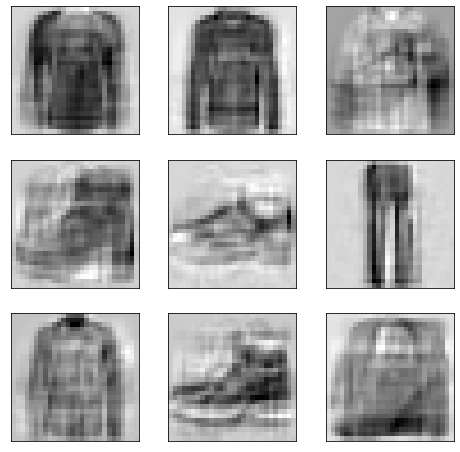

In [165]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(gaussian_generated_images[i].reshape(28,28), cmap="gray_r")